In [1]:
import numpy as np
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from nlp_id.lemmatizer import Lemmatizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_revisi.csv',sep=';')
df.head()

,Question,Class
0,Berapa harga buku?,Book Price
1,Harga buku kena berapa?,Book Price
2,Buku dijual berapa?,Book Price
3,Bukunya berapa?,Book Price
4,Berapa bukunya?,Book Price


In [3]:
features = df['Question'].values
label = df['Class'].values
print(features)

['Berapa harga buku?' ' Harga buku kena berapa?' 'Buku dijual berapa?'
 'Bukunya berapa?' 'Berapa bukunya?' 'Harga buku berapa?'
 'Buku harganya berapa?' 'Kalau harga buku berapa ya?'
 'Saya mau beli buku, kira kira harganya berapa ya?'
 'Saya mau beli buku ini' 'Buku ini harganya berapa?'
 'Harga buku ini berapa?' 'Bagaimana saya bisa membeli barang ini? '
 'Cara beli barang bagaimana?' 'Cara membeli barang bagaimana?'
 'Pembayaran apa saja yang diterima disini?'
 'bagaimana cara membeli barang tersebut?'
 'Bagaimana cara beli barang disini?'
 'Transaksinya boleh pakai e-money gak?'
 'Transaksinya boleh menggunakan m-banking?'
 'Saya mau transaksi COD bisa gak ?' 'Pembayarannya bisa lewat BCA gak?'
 'Toko ini terima pembayaran Mandiri tidak?'
 'Bayarnya bisa pakai kartu debet gak?' 'Disini bisa bayar transfer gak?'
 'Apa saja yang dapat dilakukan bot ini?'
 'Fitur apa saja yang dimiliki bot ini ?'
 'Apa saja fitur yang dimiliki bot ini ?'
 'Ada fitur apa aja buat bot ini?' 'Ada fitur 

In [4]:
#TextPreprocessing data using Sastrawi and NLP-ID 
def stop_words(stop_word, df):
    data_list = []
    for i in df:
        data_list.append(stop_word.remove(i))
    return data_list
def stem_words(stem, df):
    data_list = []
    for i in df:
        data_list.append(stem.stem(i))
    return data_list
def lemmatize_words(lemmatizer, df):
    data_list = []
    for i in df:
        data_list.append(lemmatizer.lemmatize(i))
    return np.array(data_list).reshape(-1,1)
def preprocessing_words(features,stemmer,stop_word,lemmatizer):
    features = stop_words(stop_word, features)
    features = stem_words(stemmer, features)
    features = lemmatize_words(lemmatizer, features)
    return features
stop_word = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()
lemmatizer = Lemmatizer() 

features = preprocessing_words(features, stemmer, stop_word,lemmatizer)
print(features)

[['berapa harga buku']
 ['harga buku kena berapa']
 ['buku jual berapa']
 ['buku berapa']
 ['berapa buku']
 ['harga buku berapa']
 ['buku harga berapa']
 ['kalau harga buku berapa ya']
 ['saya mau beli buku kira kira harga berapa ya']
 ['saya mau beli buku']
 ['buku harga berapa']
 ['harga buku berapa']
 ['bagaimana bisa beli barang ini']
 ['cara beli barang bagaimana']
 ['cara beli barang bagaimana']
 ['bayar apa yang terima sini']
 ['bagaimana cara beli barang sebut']
 ['bagaimana cara beli barang sini']
 ['transaksi pakai e-money gak']
 ['transaksi guna m-banking']
 ['saya mau transaksi cod gak']
 ['bayar lewat bca gak']
 ['toko terima bayar mandiri tidak']
 ['bayar pakai kartu debet gak']
 ['sini bayar transfer gak']
 ['apa yang laku bot ini']
 ['fitur apa yang milik bot']
 ['apa fitur milik bot']
 ['ada fitur apa aja buat bot ini']
 ['ada fitur apa aja bot ini']
 ['bagaimana cara bot kerja']
 ['bagaimana bot bisa bantu saya']
 ['bot ngapain aja']
 ['apa bisa bot bantu']
 ['bot bis

In [5]:
#encode class 
encoder = LabelEncoder().fit(label)
label_encoded = encoder.transform(label).reshape(-1,1)

In [6]:
#split data
X_train , X_test , y_train , y_test = train_test_split(features, label_encoded,test_size=0.1, shuffle=True)

In [7]:
X_train = X_train.flatten()
X_test = X_test.flatten()
vectorizer = CountVectorizer().fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_test.shape)

(11, 78)


[Text(283.2923076923077, 211.4, 'X[17] <= 0.5\nentropy = 3.37\nsamples = 97\nvalue = [12, 12, 10, 15, 4, 5, 6, 1, 3, 9, 12, 8]'),
 Text(257.53846153846155, 199.32, 'X[19] <= 0.5\nentropy = 3.127\nsamples = 77\nvalue = [1, 12, 10, 15, 4, 5, 6, 1, 3, 0, 12, 8]'),
 Text(244.66153846153847, 187.24, 'X[66] <= 0.5\nentropy = 2.954\nsamples = 67\nvalue = [1, 12, 0, 15, 4, 5, 6, 1, 3, 0, 12, 8]'),
 Text(218.90769230769232, 175.16, 'X[37] <= 0.5\nentropy = 2.57\nsamples = 55\nvalue = [1, 12, 0, 15, 4, 1, 1, 0, 1, 0, 12, 8]'),
 Text(206.03076923076924, 163.07999999999998, 'X[59] <= 0.5\nentropy = 2.595\nsamples = 44\nvalue = [1, 12, 0, 4, 4, 1, 1, 0, 1, 0, 12, 8]'),
 Text(193.15384615384616, 151.0, 'X[25] <= 0.5\nentropy = 2.642\nsamples = 36\nvalue = [1, 12, 0, 4, 4, 1, 1, 0, 1, 0, 4, 8]'),
 Text(180.27692307692308, 138.92000000000002, 'X[70] <= 0.5\nentropy = 2.406\nsamples = 32\nvalue = [1, 12, 0, 4, 4, 1, 1, 0, 1, 0, 0, 8]'),
 Text(167.4, 126.84, 'X[46] <= 0.5\nentropy = 2.393\nsamples = 27\

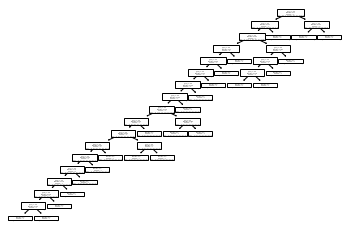

In [8]:
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model = tree_model.fit(X_train, y_train)
plot_tree(tree_model)

In [9]:
#DECISION TREE USING ID3 ALGORITHM
tree_model_prediction = tree_model.predict(X_test)
print('Accuracy : '+ str(round(accuracy_score(y_test, tree_model_prediction),2) * 100) + '%')
print(tree_model_prediction)
print(y_test.reshape(1, -1))

Accuracy : 100.0%
[10 11 10 11  1 11  8 11  5  8 10]
[[10 11 10 11  1 11  8 11  5  8 10]]


In [10]:
#Multinolomial NB
model_naive_bayes = MultinomialNB()
model_naive_bayes = model_naive_bayes.fit(X_train,y_train)


C:\Users\Matthew\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
model_naive_bayes_prediction = model_naive_bayes.predict(X_test)
print('Accuracy: ' + str(round(accuracy_score(y_test, model_naive_bayes_prediction),2) * 100) + '%')
print(model_naive_bayes_prediction)
print(y_test.reshape(1, -1))

Accuracy: 82.0%
[10 11 10 11  1 11  6 11  5  8  2]
[[10 11 10 11  1 11  8 11  5  8 10]]


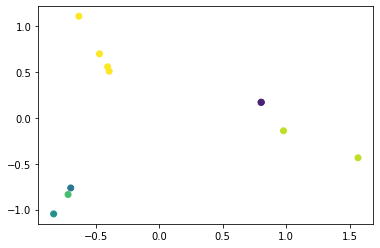

In [12]:
reduced_dimension = PCA(n_components=2).fit_transform(X_test.toarray())
plt.scatter(reduced_dimension[:, 0] , reduced_dimension[:, 1],c=model_naive_bayes_prediction)
plt.show()

In [13]:
#try to talk with chatbot
import random
def get_prediction(user_input):
    user_input = stop_word.remove(user_input)
    user_input = stemmer.stem(user_input)
    user_input = lemmatizer.lemmatize(user_input)
    user_input = vectorizer.transform([user_input])
    prediction_res = tree_model.predict(user_input)
    prediction_res = encoder.inverse_transform(prediction_res)
    return answer_bot[[prediction_res[0]]].iloc[random.randint(0, answer_bot[[prediction_res[0]]].shape[0]) - 1]


answer_bot = pd.read_csv('answer.csv',sep=';')
while True:
    print('User: ',sep='')
    user_input = str(input())
    if(user_input == 'exit' or user_input =='-e') :
        break
    predict = get_prediction(user_input)
    print('Bot: ' + str(predict[0]))

User: 
Bot: Halo! Ada yang bisa saya bantu?
User: 
Bot: Hai, ada yang bisa dibantu?
User: 


KeyboardInterrupt: Interrupted by user

In [16]:
answer_bot[['Pencil Price']].shape

(3, 1)